<a href="https://colab.research.google.com/github/lamirabbasl/blur_picture/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

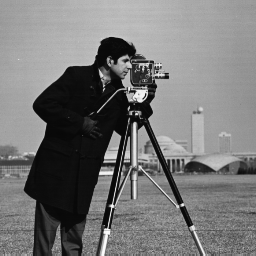

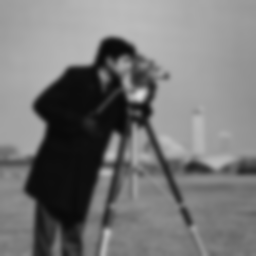

Time taken to blur image: 0.0014462471008300781 seconds


In [22]:
import cv2
from google.colab.patches import cv2_imshow
import time

def load_image(file_path):
    image = cv2.imread(file_path)
    return image

def apply_blur(image):
    blurred_image = cv2.GaussianBlur(image, (15, 15), 0) # Adjust the kernel size as per requirement
    return blurred_image

# Main function
def main():
    image_path = 'cameraman.tiff'  # Replace 'path_to_your_tiff_file.tiff' with the actual file path
    start_load = time.time()
    image = load_image(image_path)
    end_load = time.time()

    if image is None:
        print("Error: Unable to load image.")
        return

    start_blur = time.time()
    blurred_image = apply_blur(image)
    end_blur = time.time()

    cv2_imshow(image)
    cv2_imshow(blurred_image)

    print("Time taken to blur image:", end_blur - start_blur, "seconds")

if __name__ == "__main__":
    main()


In [ ]:
pip install nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter

In [28]:
import cv2
import csv

# Load the image
image = cv2.imread("cameraman.tiff")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save pixel values to CSV file
with open('pixel_values.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in gray_image:
        writer.writerow(row)

print("Pixel values saved to pixel_values.csv")


Pixel values saved to pixel_values.csv


In [34]:
%%cuda
#include <iostream>
#include <fstream>
#include <vector>
#include <sstream>
#include <cuda_runtime.h>

#define CSV_FILE "pixel_values.csv"

// Kernel function to apply blur effect on pixel values
__global__ void blurKernel(unsigned char* pixels, unsigned char* outputPixels, int width, int height) {
    // Kernel code remains the same as before
}

int main() {
    // Read pixel values from CSV file
    std::ifstream file(CSV_FILE);
    std::vector<std::vector<unsigned char>> pixelValues;
    std::string line;
    while (std::getline(file, line)) {
        std::vector<unsigned char> row;
        std::istringstream iss(line);
        std::string value;
        while (std::getline(iss, value, ',')) {
            row.push_back(std::stoi(value));
        }
        pixelValues.push_back(row);
    }

    // Determine image dimensions
    int height = pixelValues.size();
    int width = pixelValues[0].size();

    // Allocate memory for pixel values on device
    size_t imageSize = width * height * sizeof(unsigned char);
    unsigned char* d_pixels;
    cudaMalloc((void**)&d_pixels, imageSize);

    // Copy pixel values to device
    cudaMemcpy(d_pixels, pixelValues.data(), imageSize, cudaMemcpyHostToDevice);

    // Define grid and block dimensions
    dim3 blockSize(16, 16);
    dim3 gridSize((width + blockSize.x - 1) / blockSize.x, (height + blockSize.y - 1) / blockSize.y);

    // Allocate memory for output pixel values on device
    unsigned char* d_outputPixels;
    cudaMalloc((void**)&d_outputPixels, imageSize);

    // Create CUDA events for timing
    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    // Record start event
    cudaEventRecord(start);

    // Call the kernel function
    blurKernel<<<gridSize, blockSize>>>(d_pixels, d_outputPixels, width, height);

    // Record stop event
    cudaEventRecord(stop);
    cudaEventSynchronize(stop);

    // Calculate the elapsed time
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);

    std::cout << "CUDA Kernel Execution Time: " << milliseconds << " ms" << std::endl;

    // Free device memory
    cudaFree(d_pixels);
    cudaFree(d_outputPixels);

    // Destroy CUDA events
    cudaEventDestroy(start);
    cudaEventDestroy(stop);

    return 0;
}


CUDA Kernel Execution Time: 74.5882 ms

